In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error

In [2]:
df=pd.read_csv(r"C:\Users\HP\car-price-prediction-ml\data\car_data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.describe

<bound method NDFrame.describe of     Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [7]:
df.rename(columns={'Car_Name':'Car', 'Fuel_Type':'Fuel', 'Driven_kms':'Km', 'Selling_Price':'SP'},inplace=True)
df.columns

Index(['Car', 'Year', 'SP', 'Present_Price', 'Km', 'Fuel', 'Selling_type',
       'Transmission', 'Owner'],
      dtype='object')

In [8]:
df.head()

,Car,Year,SP,Present_Price,Km,Fuel,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
df.isnull().sum()

Car              0
Year             0
SP               0
Present_Price    0
Km               0
Fuel             0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [10]:
df.dtypes

Car               object
Year               int64
SP               float64
Present_Price    float64
Km                 int64
Fuel              object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [11]:
df[df.duplicated()].count().sum()

np.int64(18)

In [12]:
df=df.drop_duplicates()
df[df.duplicated()].count().sum()

np.int64(0)

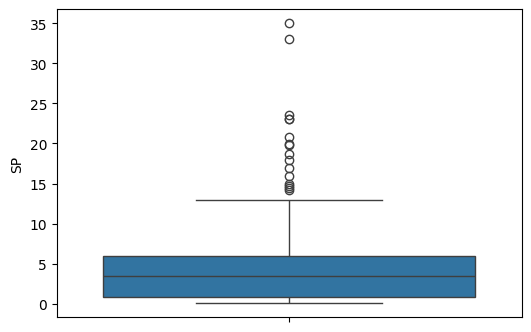

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(df['SP'])
plt.show()

In [14]:
df.max

<bound method DataFrame.max of          Car  Year     SP  Present_Price     Km    Fuel Selling_type  \
0       ritz  2014   3.35           5.59  27000  Petrol       Dealer   
1        sx4  2013   4.75           9.54  43000  Diesel       Dealer   
2       ciaz  2017   7.25           9.85   6900  Petrol       Dealer   
3    wagon r  2011   2.85           4.15   5200  Petrol       Dealer   
4      swift  2014   4.60           6.87  42450  Diesel       Dealer   
..       ...   ...    ...            ...    ...     ...          ...   
296     city  2016   9.50          11.60  33988  Diesel       Dealer   
297     brio  2015   4.00           5.90  60000  Petrol       Dealer   
298     city  2009   3.35          11.00  87934  Petrol       Dealer   
299     city  2017  11.50          12.50   9000  Diesel       Dealer   
300     brio  2016   5.30           5.90   5464  Petrol       Dealer   

    Transmission  Owner  
0         Manual      0  
1         Manual      0  
2         Manual      0  


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,299.0,2013.615385,2.896868,2003.00,2012.00,2014.00,2016.00,2018.0
SP,299.0,4.589632,4.984240,0.10,0.85,3.51,6.00,35.0
Present_Price,299.0,7.541037,8.566332,0.32,1.20,6.10,9.84,92.6
Km,299.0,36916.752508,39015.170352,500.00,15000.00,32000.00,48883.50,500000.0
Owner,299.0,0.043478,0.248720,0.00,0.00,0.00,0.00,3.0


In [16]:
df.select_dtypes(include=["object"]).columns

Index(['Car', 'Fuel', 'Selling_type', 'Transmission'], dtype='object')

In [17]:
df["Car"].nunique()

98

In [22]:
df.columns

Index(['Year', 'SP', 'Present_Price', 'Km', 'Owner', 'Fuel_Diesel',
       'Fuel_Petrol', 'Selling_type_Individual', 'Transmission_Manual'],
      dtype='object')

In [23]:
df = pd.get_dummies(df, drop_first=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     299 non-null    int64  
 1   SP                       299 non-null    float64
 2   Present_Price            299 non-null    float64
 3   Km                       299 non-null    int64  
 4   Owner                    299 non-null    int64  
 5   Fuel_Diesel              299 non-null    bool   
 6   Fuel_Petrol              299 non-null    bool   
 7   Selling_type_Individual  299 non-null    bool   
 8   Transmission_Manual      299 non-null    bool   
dtypes: bool(4), float64(2), int64(3)
memory usage: 15.2 KB


In [25]:
x=df.drop("SP",axis=1)
y=df["SP"]

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [30]:
model=LinearRegression()
model.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [32]:
y_pred=model.predict(x_test)
print("R2 score : ",r2_score(y_test,y_pred))
print("MAE : ",mean_absolute_error(y_test,y_pred))


R2 score :  0.7527233824219837
MAE :  1.4725457508179547


In [35]:
import joblib
model.fit(x_train,y_train)
joblib.dump(model,"model.pkl")
print("Model Saved!")

Model Saved!
